# Proyecto CSV: Analisis de un Dataset

__Nombre:__ Eduardo Carrion

__Dataset:__ "Udemy Courses"

Analisis de un dataset con información de Udemy

![Trip Advisor logo](https://www.wpfaster.org/wp-content/uploads/2018/02/udemy-logo.svg)

## General Info on Udemy:

Udemy, Inc. is an American massive open online course provider aimed at professional adults and students. 

It was founded in May 2010 by Eren Bali, Gagan Biyani, and Oktay Caglar.

As of Jan 2020, the platform has more than 35 million students and 57,000 instructors teaching courses in over 65 languages.

# Importacion Librerias y Dataset

In [18]:
import pandas as pd

import plotly.express  as px
import plotly.graph_objects as go
fig = go.Figure()

import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('ggplot')

import plotly.io as pio
pio.templates.default = "plotly_dark"
sns.set_style('darkgrid')
%matplotlib inline

# Contenido del Dataset

In [12]:
data = pd.read_csv('data/udemy_courses.csv')
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


# 1) Agrupación de cursos por tópico

In [13]:
Subject = pd.DataFrame(data['subject'].value_counts()).reset_index(drop = False)
fig = px.pie(Subject, values =Subject.subject, names = Subject['index'],
             title='Distribucion de cursos Udemy')
fig.show()

# 2) Aumento de cursos dentro de Udemy

In [14]:
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])
data['year'] = data['published_timestamp'].dt.year

Year_wise = data.groupby('year')['course_id'].count().sort_values().reset_index()
Year_wise.rename({'course_id':'Numero de cursos'},axis = 1, inplace = True)

fig = px.bar(Year_wise, y = 'Numero de cursos', x = 'year', color = 'year')
fig.update_layout(title = 'Cursos publicados por año')
fig.show()

# 3) Top 25 cursos más accedidos de pago

In [19]:
top25_paid = data.sort_values("price", ascending=False)[0:25].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index(drop =True)
fig = px.bar(top25_paid,
       y = 'course_title',
       x= 'num_subscribers',
       orientation = 'h',
       color='num_subscribers',
      hover_data=['price','num_reviews','num_lectures'])

fig.update_layout(showlegend=False)
fig.update_xaxes(title='Numero de Subscritores')
fig.update_yaxes(title='Nombre del Curso')
fig.update_layout(title = 'Top 25 cursos más famosos de pago')
fig.show()

# 4) Top 25 cursos más accedidos gratis

In [16]:
Unpaid = data[data['is_paid']==False]

top25_free = Unpaid.sort_values("num_subscribers", 
                                ascending=False)[0:25].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()
fig = px.bar(top25_free,
       y = 'course_title',
       x= 'num_subscribers',
       orientation = 'h',
       color='num_subscribers',
      hover_data=['num_reviews','num_lectures','year'])


fig.update_layout(showlegend=False)
fig.update_xaxes(title='Numero de Suscriptores')
fig.update_yaxes(title='Nombre del Curso')
fig.update_layout(title = 'Top 25 cursos más famosos gratis')
fig.show()

# 5) Top 10 cursos de Desarrollo Web

In [17]:
Web = data[data['subject']=='Web Development']
top_web = Web.sort_values("num_subscribers", 
                                ascending=False)[0:10].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()

fig = px.bar(top_web,
       y = 'course_title',
       x= 'num_subscribers',
       orientation = 'h',
       color='num_subscribers',
      hover_data=['num_reviews','num_lectures','year','url'])


fig.update_layout(showlegend=True)
fig.update_xaxes(title='Numero de Subscriptores')
fig.update_yaxes(title='Nombre del Curso')
fig.update_layout(title = 'Top 10 cursos de Desarrollo Web')
fig.show()

# 6) Top 10 cursos de Business Finance

In [16]:
Bus = data[data['subject']=='Business Finance']

top_web = Bus.sort_values("num_subscribers", 
                                ascending=False)[0:10].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()

fig = px.bar(top_web,
       y = 'course_title',
       x= 'num_subscribers',
       orientation = 'h',
       color='num_subscribers',
      hover_data=['num_reviews','num_lectures','year','url'])


fig.update_layout(showlegend=False)
fig.update_xaxes(title='Numero Subscriptores')
fig.update_yaxes(title='Nombre del curso',showticklabels= True)
fig.update_layout(title = 'Top 10 cursos de Business Finance')
fig.show()

# 7) Top 10 cursos de Diseño Gráfico

In [15]:
Graphic = data[data['subject']=='Graphic Design']

top_graph = Graphic.sort_values("num_subscribers", 
                                ascending=False)[0:10].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()

fig = px.bar(top_graph,
       y = 'course_title',
       x= 'num_subscribers',
       orientation = 'h',
       color='num_subscribers',
      hover_data=['num_reviews','num_lectures','year','url'])


fig.update_layout(showlegend=False)
fig.update_xaxes(title='Numero de Subscriptores')
fig.update_yaxes(title='Nombre del Curso',showticklabels= True)
fig.update_layout(title = 'Top 10 cursos de Diseño Gráfico')
fig.show()

# 8) Top 10 cursos de Música

In [14]:
Music = data[data['subject']=='Musical Instruments']

top_music= Music.sort_values("num_subscribers", 
                                ascending=False)[0:10].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()

fig = px.bar(top_music,
       y = 'course_title',
       x= 'num_subscribers',
       orientation = 'h',
       color='num_subscribers',
      hover_data=['num_reviews','num_lectures','year','url'])

fig.update_xaxes(title='Numero de Subscriptores')
fig.update_yaxes(title='Nombre del Curso')
fig.update_layout(title = 'Top 10 cursos de Música')
fig.show()

# 9) Duración del curso según el costo

In [13]:
fig = px.box(data,
       x='content_duration',
       y='is_paid',
       orientation='h',
       color='is_paid',
       title='Duration Distribution Across Type of Course',
       color_discrete_sequence=['#03cffc','#eb03fc']
      )

fig.update_layout(showlegend=False)
fig.update_xaxes(title='Duración del curso')
fig.update_yaxes(title='Curso de pago')
fig.update_layout(title = 'Duración de cursos por costo')
fig.show()

# 10) Cantidad cursos por el costo

In [12]:
course_fee = data.groupby('is_paid')['course_title'].count().reset_index().sort_values('course_title',ascending = False)

course_fee = course_fee.rename(columns = {'course_title':'count'})
fig = px.bar(course_fee, x='is_paid', y='count', color='count')
fig.update_layout(title="Cantidad cursos de pago vs curso gratis")
fig.update_yaxes(title='Cantidad')
fig.update_xaxes(title='Es de pago')
fig.show()

# 11) Cursos agrupados por su costo

In [11]:
a = data['price'].value_counts().reset_index()
fig=go.Figure(data=[go.Pie(labels=a['price'],
                          values=a['index'],
                          hole=.3,
                          title="Cursos por precio")])
fig.update_layout(title="Numero de cursos agrupados por precio")
fig.show()

# 12) Numero de cursos por dificultad

In [10]:
difficulty_level = data.groupby('level')['course_title'].count().reset_index().sort_values('course_title',ascending = False)
difficulty_level = difficulty_level.rename(columns = {'course_title':'count'})
fig = px.bar(difficulty_level, x='level', y='count', color='count')
fig.update_layout(title="Cantidad de cursos por dificultad")
fig.update_yaxes(title='Cantidad')
fig.update_xaxes(title='Nivel')
fig.show()

# 13) Cantidad de Cursos por tópico

In [24]:
subject = data.groupby('subject')['course_title'].count().reset_index().sort_values('course_title',ascending = False)
subject = subject.rename(columns = {'course_title':'count'})
fig = px.bar(subject, x='subject', y='count', color='count')
fig.update_layout(title="Cursos por tópico")
fig.update_yaxes(title='Número de subscriptores')
fig.update_xaxes(title='Tópico')
fig.show()

# 14) Número de revisiones vs Número de suscriptores

In [9]:
fig = px.scatter(data,x = data['num_reviews'], y = data['num_subscribers'],
           hover_data = ['course_title'],color=data["subject"])

fig.update_layout(title="Revisiones vs Subscriptores")
fig.update_yaxes(title='Número de subscriptores')
fig.update_xaxes(title='Número de revisiones')
fig.show()

# 15) Numero de suscriptores vs Precio del curso

In [8]:
fig = px.scatter(data, x = data['price'], y = data['num_subscribers'],
                 hover_data = ['course_title'],
              color=data["subject"])

fig.update_layout(title="Subscriptores vs Precio")
fig.update_yaxes(title='Número de subscriptores')
fig.update_xaxes(title='Precio del Curso')
fig.show()

# 16) Precio vs Duración del Curso

In [7]:
fig = px.scatter(data,x = data['price'], y = data['content_duration'],
           hover_data = ['course_title'],color=data["subject"])

fig.update_layout(title="Precio vs Duración")
fig.update_xaxes(title='Precio del Curso')
fig.update_yaxes(title='Duración del Contenido')
fig.show()

# 17) Precio de Curso Agrupado por Tópicos

In [20]:
fig = px.box(data,
      x = 'subject',
      y = 'price',
      hover_name = 'course_title',
      color = 'subject',
      title = 'Precio cursos vs Topico'
)
fig.update_xaxes(title='Tópico')
fig.update_yaxes(title='Precio del Curso')
fig.show()

# 18) Adición de Cursos Anual por Tópico

In [38]:
data["published_timestamp"] = pd.to_datetime(data["published_timestamp"])
data["year"] = data["published_timestamp"].dt.year

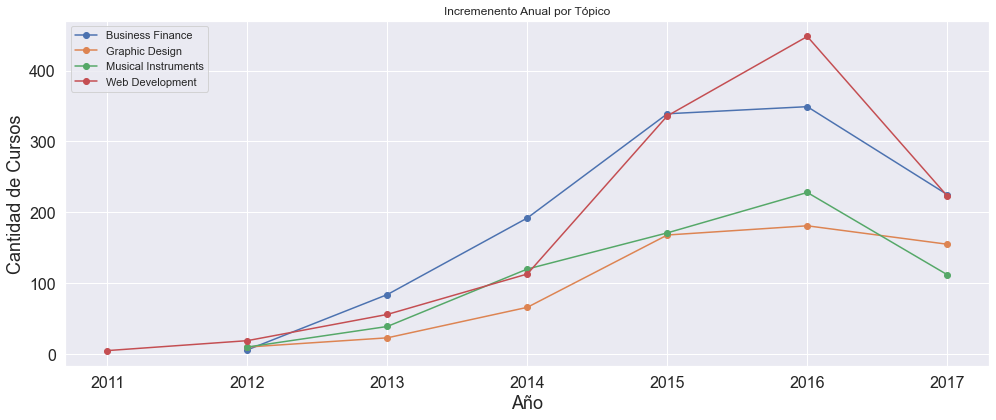

In [42]:
sample_business = data.groupby("subject").get_group("Business Finance").groupby("year").count()
sample_design = data.groupby("subject").get_group("Graphic Design").groupby("year").count()
sample_musical = data.groupby("subject").get_group("Musical Instruments").groupby("year").count()
sample_web = data.groupby("subject").get_group("Web Development").groupby("year").count()


sns.set()
plt.figure(figsize=(14,6))

plt.plot(sample_business.index, sample_business["subject"], marker="o", label="Business Finance")
plt.plot(sample_design.index, sample_design["subject"], marker="o", label="Graphic Design")
plt.plot(sample_musical.index, sample_musical["subject"], marker="o", label="Musical Instruments")
plt.plot(sample_web.index, sample_web["subject"], marker="o", label="Web Development")
plt.xlabel("Año", fontsize=18)
plt.ylabel("Cantidad de Cursos", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Incremenento Anual por Tópico")
plt.tight_layout()
plt.legend()

# 19) Top 25 cursos más costosos

In [60]:
top25_paid = data.sort_values("price", ascending=False)[0:25].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index(drop =True)
fig = px.bar(top25_paid,
       y = 'course_title',
       x= 'price',
       orientation = 'h',
       color='price',
      hover_data=['price','num_reviews','num_lectures'])

fig.update_layout(showlegend=False)
fig.update_xaxes(title='Costo')
fig.update_yaxes(title='Nombre del Curso')
fig.update_layout(title = 'Top 25 cursos más costosos')
fig.show()

# 20) Porcentaje cursos de pago y gratuitos

In [74]:
fig = px.pie(course_fee, values =course_fee.course_title, names = course_fee['is_paid'],
             title='Porcentaje cursos de pago y gratuitos')
fig.show()